# 51. Introdução a Análise de Sentimentos

## Para o que serve

> Avaliar percepção de produto.

> Monitorar Redes Sociais.

> Monitorar marcas, produtos, lançamentos.

> Pesquisa de mercado.

## Formas

> Positivo, Negativo, Neutro.

> Sentimentos específicos.

> Valor inteiro: 1 a 10.

> Sistema de Estrelas: de 1 a 5.

## Tarefa desafiadora

> Um sentimento negativo nem sempre vem expresso através de adjetivos como "ruim", "não gostei":
>> Ex: "A tela deste celular poderia ser maior"

> Contexto é muito importante:
>> "Tive uma péssima experiência com o concorrente".

> Ironia e Sarcasmo:
> Ex: "Ótimo atendimento, só esperei 40 minutos".

> Ambiguidade:
> Ex: "José pediu a lucas que pegasse seu celular".

> Emojis

## Como funciona:

> Sistemas de Regras:
- Não precisa de treinamento, não dependem de dados.
- Não aprende.

> Sistemas com AI/ML
- Dependem de dados para treinamento
- Podem ser treinados para negócios específicos

## Sistemas com AI/ML

> Supervisionado

> Não supervisionado
- Palavras negativas próximas.

# 52. Exemplo prático com LSTM

## Tarefa Supervisionada

* Dados Rotulados

## Airline Sentiments (tweets)

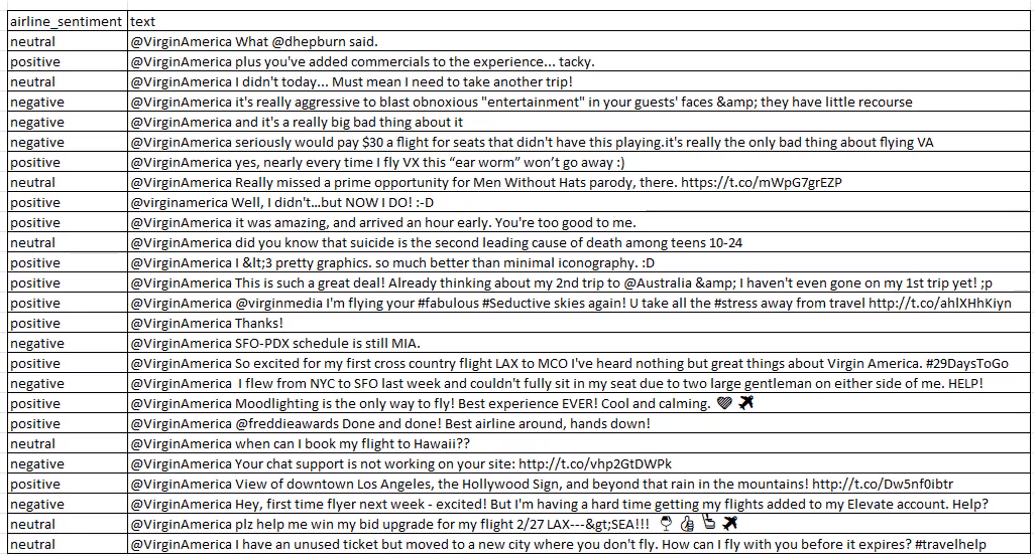

In [2]:
from PIL import Image

display(Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\7_Analise_de_Sentimentos\airline_sentiments.png'))


# 53. LSTM parte I

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from keras.utils import to_categorical
import np_utils
import numpy as np

In [16]:
Tweets = pd.read_csv('D:\\Users\\Nayan Couto\\Cloud Drive\\Documentos\\Arquivos PDF, PPT, DOC\\CURSOS\\Processamento de Linguagem Natural\\NLP\\7_Analise_de_Sentimentos\\Tweets.csv')

Tweets.head(15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [17]:
Tweets.groupby('airline_sentiment').size()

airline_sentiment
negative    9178
neutral     3099
positive    2363
dtype: int64

In [18]:
Tweets = Tweets[Tweets['airline_sentiment_confidence'] > 0.8]

In [19]:
token = Tokenizer(num_words=100)
token.fit_on_texts(Tweets['text'].values)

In [20]:
X = token.texts_to_sequences(Tweets['text'].values)

In [21]:
X = pad_sequences(X, padding='post', maxlen=100) 

In [22]:
print(X)

[[97 62  0 ...  0  0  0]
 [97 99  1 ...  0  0  0]
 [97  9 99 ...  0  0  0]
 ...
 [13 98 93 ...  0  0  0]
 [13 89  1 ...  0  0  0]
 [13  6 23 ...  0  0  0]]


# 54. LSTM parte II

In [24]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(Tweets['airline_sentiment'].values)
print(y)

[1 0 0 ... 0 1 0]


In [25]:
y = to_categorical(y, 3)
print(y)

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
modelo = Sequential()
modelo.add(Embedding(input_dim= len(token.word_index), output_dim=128))
modelo.add(SpatialDropout1D(0.2))
modelo.add(LSTM(196, dropout=0.2, recurrent_dropout=0, activation='tanh', recurrent_activation='sigmoid', unroll=False, use_bias=True))
modelo.add(Dense(3, activation='softmax'))

In [30]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
print(modelo.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


# 55. LSTM parte III

In [32]:
modelo.fit(X_train, y_train, epochs=10, batch_size=30, verbose=True, validation_data=(X_test, y_test))

Epoch 1/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 49s 181ms/step - accuracy: 0.6946 - loss: 0.8294 - val_accuracy: 0.7027 - val_loss: 0.8196
Epoch 2/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 44s 179ms/step - accuracy: 0.7119 - loss: 0.8042 - val_accuracy: 0.7027 - val_loss: 0.8153
Epoch 3/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 43s 175ms/step - accuracy: 0.7129 - loss: 0.8049 - val_accuracy: 0.7027 - val_loss: 0.8181
Epoch 4/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - accuracy: 0.7111 - loss: 0.8048 - val_accuracy: 0.7027 - val_loss: 0.8140
Epoch 5/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 35s 143ms/step - accuracy: 0.7043 - loss: 0.8175 - val_accuracy: 0.7027 - val_loss: 0.8157
Epoch 6/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 35s 144ms/step - accuracy: 0.7022 - loss: 0.8180 - val_accuracy: 0.7027 - val_loss: 0.8148
Epoch 7/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - accuracy: 0.7020 - loss: 0.8177 - val_accuracy: 0.7027 - val_loss: 0.8142
Epoch 8/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 46s 189ms/step - accuracy: 0.7034 - loss: 0

In [33]:
loss, accuracy = modelo.evaluate(X_test, y_test, verbose=True)
print("Loss: {:.4f}".format(loss))
print("Accuracy: {:.4f}".format(accuracy))

99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.6994 - loss: 0.8208
Loss: 0.8117
Accuracy: 0.7027


In [34]:
prev = modelo.predict(X_test)
prev

99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step


array([[0.6855388 , 0.15429275, 0.16016844],
       [0.6855388 , 0.15429275, 0.16016845],
       [0.6855388 , 0.15429275, 0.16016844],
       ...,
       [0.6855388 , 0.15429275, 0.16016844],
       [0.6855388 , 0.15429275, 0.16016844],
       [0.6855388 , 0.15429275, 0.16016845]], dtype=float32)

# 56. VADER: Análise de Sentimento com Regras

- Apenas textos em Inglês (porém existem forks em outras linguagens)
- https://github.com/rafjaa/LeIA

## 57. VADER na Prática

In [36]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Nayan
[nltk_data]     Couto\AppData\Roaming\nltk_data...


True

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
mas = SentimentIntensityAnalyzer()

In [38]:
a = 'I HATE this movie!!!'
x = mas.polarity_scores(a)

In [39]:
print(x)

{'neg': 0.726, 'neu': 0.274, 'pos': 0.0, 'compound': -0.7437}


In [42]:
a = 'I hate this movie, but i love the girl!!!'
x = mas.polarity_scores(a)

In [43]:
print(x)

{'neg': 0.168, 'neu': 0.356, 'pos': 0.476, 'compound': 0.745}


In [44]:
a = ':('
x = mas.polarity_scores(a)

In [45]:
print(x)

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}


In [46]:
a = 'I love this movie!!! But the girl is so ugly!!!'
x = mas.polarity_scores(a)

In [47]:
print(x)

{'neg': 0.423, 'neu': 0.421, 'pos': 0.156, 'compound': -0.7528}


In [48]:
print(type(x))

<class 'dict'>


In [49]:
print(x['compound'])

-0.7528


In [50]:
from textblob import TextBlob
teste = TextBlob("I love this movie!!! But the girl is so ugly!!!")
print(teste.sentiment)

Sentiment(polarity=-0.01171875, subjectivity=0.8)


In [51]:
! pip install translate

In [53]:
from translate import Translator
translator = Translator(from_lang="pt", to_lang="en")
translation = translator.translate("O filme foi fantástico, mas o garoto é muito ruim!!!")
print(translation)

The movie was fantastic, but the kid is really bad!!!


In [54]:
x = mas.polarity_scores(translation)
print(x)

{'neg': 0.371, 'neu': 0.489, 'pos': 0.141, 'compound': -0.6971}


# 58. Comparando Regras com Modelo Supervisionado

## Conjunto de Dados

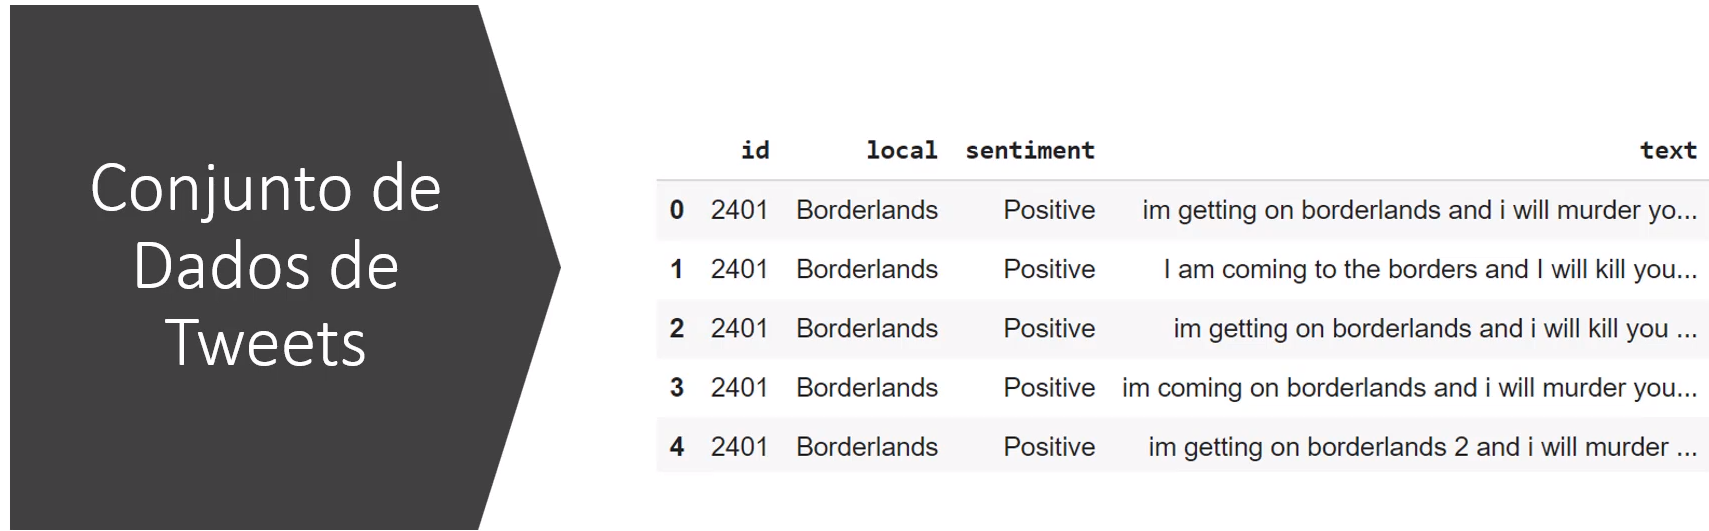

In [55]:
from PIL import Image

display(Image.open('D:\\Users\\Nayan Couto\\Cloud Drive\\Documentos\\Arquivos PDF, PPT, DOC\\CURSOS\\Processamento de Linguagem Natural\\NLP\\7_Analise_de_Sentimentos\\Tweets2.png'))

# 59. Regras VS Supervisionado Parte I

In [56]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Nayan
[nltk_data]     Couto\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [57]:
Tweets2 = pd.read_csv('D:\\Users\\Nayan Couto\\Cloud Drive\\Documentos\\Arquivos PDF, PPT, DOC\\CURSOS\\Processamento de Linguagem Natural\\NLP\\7_Analise_de_Sentimentos\\Tweets2.csv')

In [58]:
Tweets2.shape

(74682, 4)

In [60]:
Tweets2.head(10)

,id,local,sentiment,text
0,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
1,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
2,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
3,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
4,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
5,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"
6,2402,Borderlands,Positive,So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg
7,2402,Borderlands,Positive,"So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg"
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters.
9,2402,Borderlands,Positive,So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg


In [61]:
Tweets2.groupby(['sentiment']).size()

sentiment
Irrelevant    12990
Negative      22542
Neutral       18318
Positive      20832
dtype: int64

<Axes: xlabel='sentiment'>

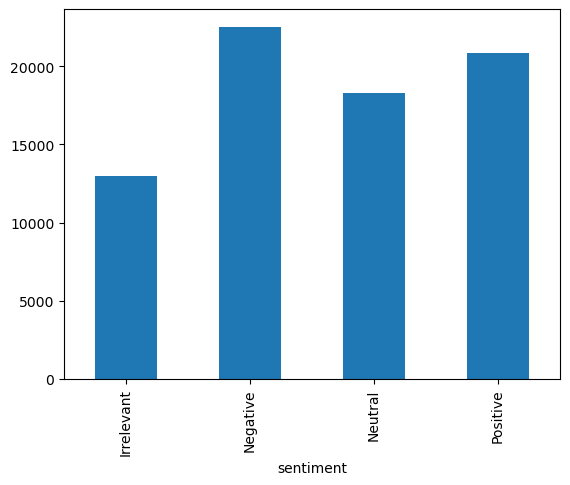

In [62]:
Tweets2.groupby(['sentiment']).size().plot.bar()

In [64]:
Tweets2.loc[Tweets2['sentiment']=='Irrelevant', 'sentiment'] = 'Neutral'

In [65]:
Tweets2.groupby(['sentiment']).size()

sentiment
Negative    22542
Neutral     31308
Positive    20832
dtype: int64

<Axes: xlabel='sentiment'>

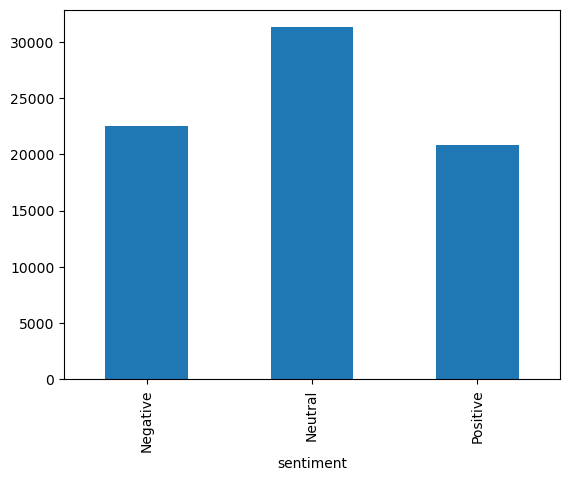

In [66]:
Tweets2.groupby(['sentiment']).size().plot.bar()

In [67]:
Tweets2 = Tweets2.dropna(subset=['text'])
Tweets2.reset_index(drop=True, inplace=True)

In [68]:
Tweets2.shape

(73996, 4)

# 60. Regras VS Supervisionado Parte II

## Supervisionado

In [69]:
token2 = Tokenizer(num_words=100)
token2.fit_on_texts(Tweets2['text'].values)

In [71]:
X = token2.texts_to_sequences(Tweets2['text'].values)
X = pad_sequences(X, padding='post', maxlen=100)

In [72]:
print(X)

[[13  4  2 ...  0  0  0]
 [ 2  3  1 ...  0  0  0]
 [13  4  2 ...  0  0  0]
 ...
 [23  1  6 ...  0  0  0]
 [23  1  6 ...  0  0  0]
 [23 30  1 ...  0  0  0]]


In [73]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(Tweets2['sentiment'].values)
print(y)

[2 2 2 ... 2 2 2]


In [74]:
y = to_categorical(y, 3) #OneHot Encoder
print(y)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_test

array([[49, 39, 38, ...,  0,  0,  0],
       [12, 85, 85, ...,  0,  0,  0],
       [59,  3,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [65, 65, 16, ...,  0,  0,  0],
       [59, 13, 64, ...,  0,  0,  0]])

In [76]:
modelo = Sequential()
modelo.add(Embedding(input_dim= len(token2.word_index), output_dim=128))
modelo.add(SpatialDropout1D(0.2))
modelo.add(LSTM(196, dropout=0.2, recurrent_dropout=0, activation='tanh', recurrent_activation='sigmoid', unroll=False, use_bias=True))
modelo.add(Dense(3, activation='softmax'))

In [77]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelo.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [78]:
modelo.fit(X_train, y_train, epochs=5, batch_size=500, verbose=True)

Epoch 1/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.4049 - loss: 1.0863
Epoch 2/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.4168 - loss: 1.0834
Epoch 3/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.4130 - loss: 1.0846
Epoch 4/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.4202 - loss: 1.0822
Epoch 5/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.4148 - loss: 1.0844


In [79]:
loss, accuracy = modelo.evaluate(X_test, y_test, verbose=True)
print("Loss: {:.4f}".format(loss))
print("Accuracy: {:.4f}".format(accuracy))

925/925 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.4146 - loss: 1.0840
Loss: 1.0809
Accuracy: 0.4234


# 61. Regras VS Supervisionado Parte III

## VADER

In [80]:
#from pandas.core.internals.managers import T
mas = SentimentIntensityAnalyzer()
Tweets2['vander_sentiment'] = ''

for y in range(len(Tweets2.index)):
  x = mas.polarity_scores(Tweets2['text'].iloc[y])
  del x['compound']
  maior = max(x,key=x.get) #neg pos neu
  Tweets2.loc[y,'vander_sentiment'] = maior

In [81]:
Tweets2.groupby(['vander_sentiment']).size()

vander_sentiment
neg     3660
neu    65581
pos     4755
dtype: int64

In [82]:
Tweets2.groupby(['sentiment']).size()

sentiment
Negative    22358
Neutral     30983
Positive    20655
dtype: int64

In [83]:
Tweets2.loc[Tweets2['vander_sentiment']== 'neu' , 'vander_sentiment'] = 'Neutral'
Tweets2.loc[Tweets2['vander_sentiment']== 'neg' , 'vander_sentiment'] = 'Negative'
Tweets2.loc[Tweets2['vander_sentiment']== 'pos' , 'vander_sentiment'] = 'Positive'

In [85]:
Tweets2.groupby(['vander_sentiment']).size()

vander_sentiment
Negative     3660
Neutral     65581
Positive     4755
dtype: int64

In [86]:
y_pred = Tweets2['vander_sentiment']
y_test = Tweets2['sentiment']
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 2004 19902   452]
 [ 1122 28384  1477]
 [  534 17295  2826]]


In [87]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.44886210065408944
